In [7]:
import cv2
import os
import time
import uuid

In [2]:
IMAGE_PATH = os.path.join('data', 'images')
number_images=30

In [3]:
cap=cv2.VideoCapture(0)
# noinspection PyPackageRequirements
for imgnum in range(number_images): 
    print(f"collecting image {imgnum}")
    ret, frame = cap.read()
    imgname=os.path.join(IMAGE_PATH, f"{str(uuid.uuid1())}.jpg")
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame',frame)
    time.sleep(0.1)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    

collecting image 0
collecting image 1
collecting image 2
collecting image 3
collecting image 4


2024-11-26 12:21:37.053 Python[16013:868042] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-26 12:21:37.053 Python[16013:868042] +[IMKInputSession subclass]: chose IMKInputSession_Modern


collecting image 5
collecting image 6
collecting image 7
collecting image 8
collecting image 9
collecting image 10
collecting image 11
collecting image 12
collecting image 13
collecting image 14
collecting image 15
collecting image 16
collecting image 17
collecting image 18
collecting image 19
collecting image 20
collecting image 21
collecting image 22
collecting image 23
collecting image 24
collecting image 25
collecting image 26
collecting image 27
collecting image 28
collecting image 29


In [1]:
!labelme

2024-11-25 19:30:53,130 [INFO   ] __init__:get_config:67- Loading config file from: /Users/raghuvar/.labelmerc
2024-11-25 19:30:53.547 Python[12737:638893] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-25 19:30:53.547 Python[12737:638893] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [8]:
import tensorflow as tf
import json
import numpy as np
import matplotlib.pyplot as plt

In [11]:
images=tf.data.Dataset.list_files('data/images/*.jpg', shuffle=False)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data/images/*.jpg'

In [10]:
images.as_numpy_iterator().next()

NameError: name 'images' is not defined

In [8]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io. decode_jpeg(byte_img)
    return img

In [9]:
images = images.map(load_image)
images.as_numpy_iterator().next()

NameError: name 'images' is not defined

In [9]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [6]:
image_generator = images.batch(4).as_numpy_iterator()

NameError: name 'images' is not defined

In [20]:
plot_images = image_generator.next()

NameError: name 'plot_images' is not defined

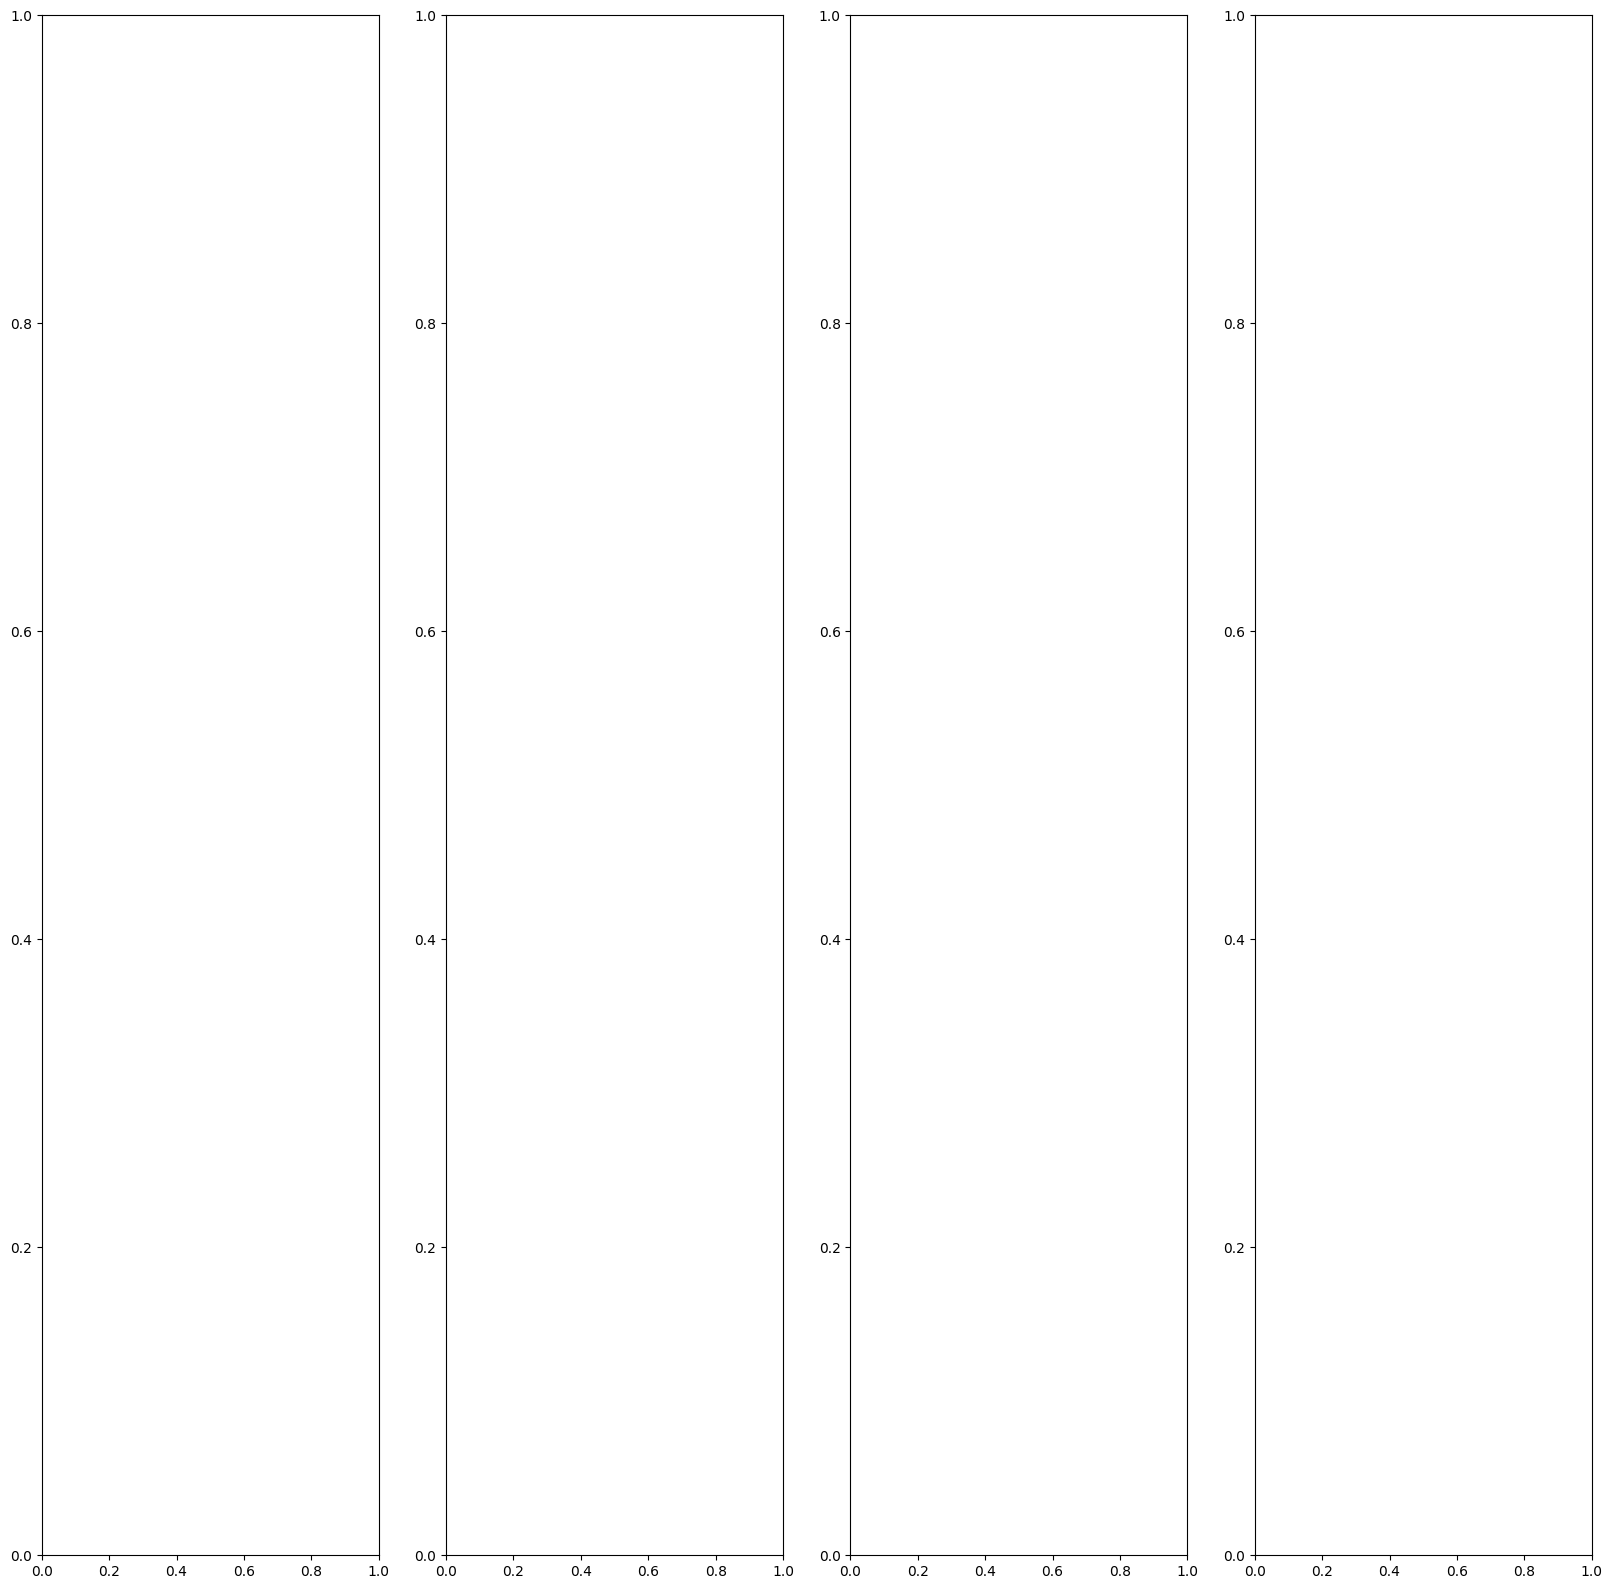

In [5]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate (plot_images):
    ax[idx].imshow(image)
plt.show()

In [9]:
import os

In [13]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join( 'data','labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path. join( 'data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

In [10]:
import ssl
import certifi

ssl._create_default_https_context = ssl._create_unverified_context


In [11]:
import albumentations as alb

In [157]:
img=cv2.imread (os.path.join('data', 'test', 'images', '23f2b9ac-ab32-11ef-8498-ee23d088143a.jpg'))

In [158]:
img.shape

(720, 1280, 3)

In [159]:
augmentor = alb.Compose([alb.RandomCrop(width=1280, height=720), 
                         alb.HorizontalFlip(p=0.5),
                alb.RandomBrightnessContrast(p=0.2),
                alb. RandomGamma (p=0.2),
                alb.RGBShift(p=0.2),
                alb. VerticalFlip(p=0.5)],
                bbox_params=alb.BboxParams(format='albumentations', label_fields=['class_labels']))

In [160]:
img=cv2. imread (os.path.join('data', 'train', 'images', 'ab850456-ab32-11ef-8498-ee23d088143a.jpg'))

In [161]:
with open(os.path.join( 'data', 'train', 'labels', 'ab850456-ab32-11ef-8498-ee23d088143a.json'), 'r') as f:
    label = json. load (f)

In [162]:
label

{'version': '5.5.0',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[578.6075949367088, 94.81012658227853],
    [952.0253164556962, 547.9746835443038]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None}],
 'imagePath': '../images/ab850456-ab32-11ef-8498-ee23d088143a.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCALQBQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRC

In [163]:
label['shapes'][0]['points']

[[578.6075949367088, 94.81012658227853],
 [952.0253164556962, 547.9746835443038]]

In [164]:
coords = [0,0,0,0]
coords[0] = label[ 'shapes'][0]['points'][0][0] 
coords[1] = label[ 'shapes'][0]['points'][0][1]
coords[2] = label[ 'shapes'][0]['points'][1][0]
coords[3] = label[ 'shapes'][0]['points'][1][1]

In [165]:
coords

[578.6075949367088, 94.81012658227853, 952.0253164556962, 547.9746835443038]

In [166]:
height, width = img.shape[:2]
# height, width=480, 640
coords = list(np.divide(coords, [1280, 720, 1280, 720]))


In [167]:
height, width

(720, 1280)

In [168]:
coords = [
    label['shapes'][0]['points'][0][0] / width,
    label['shapes'][0]['points'][0][1] / height,
    label['shapes'][0]['points'][1][0] / width,
    label['shapes'][0]['points'][1][1] / height,
]


In [169]:
coords

[0.4520371835443037,
 0.13168073136427574,
 0.7437697784810127,
 0.7610759493670887]

In [170]:
augmented = augmentor (image=img, bboxes=[coords], class_labels=['face'])

In [171]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [172]:
augmented['image'].shape

(720, 1280, 3)

In [173]:
augmented['bboxes']

[[0.45203718543052673,
  0.2389240264892578,
  0.7437697649002075,
  0.8683192729949951]]

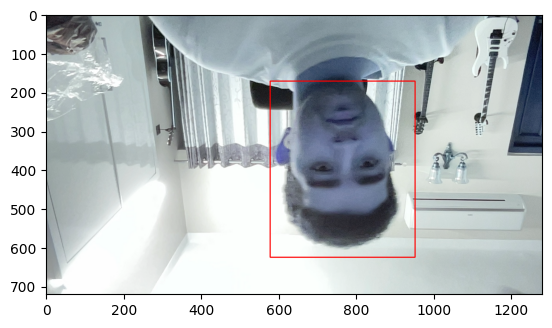

In [174]:
cv2.rectangle(augmented['image'],
    tuple(np.multiply(augmented['bboxes'][0][:2], [1280, 720]).astype(int)),
    tuple(np.multiply(augmented['bboxes'][0][2:], [1280, 720]).astype(int)),
    (255,0,0), 2)
plt.imshow(augmented['image'])

In [176]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [1280,720,1280,720]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

image must be numpy array type
x_max is less than or equal to x_min for bbox [0.65773338 0.83491564 0.3986353  0.30221519 0.        ].
x_max is less than or equal to x_min for bbox [0.66960049 0.85425454 0.40160206 0.30045709 0.        ].
x_max is less than or equal to x_min for bbox [0.66465586 0.87886781 0.44214794 0.30397329 0.        ].
image must be numpy array type
image must be numpy array type


In [177]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [178]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [179]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [180]:
train_images.as_numpy_iterator().next()

array([[[0.67745095, 0.6617647 , 0.61470586],
        [0.672549  , 0.6647059 , 0.61764705],
        [0.68333334, 0.68333334, 0.6362745 ],
        ...,
        [0.81960785, 0.81960785, 0.7882353 ],
        [0.78431374, 0.7823529 , 0.75686276],
        [0.7647059 , 0.7764706 , 0.7490196 ]],

       [[0.66535944, 0.64967316, 0.60261434],
        [0.65686274, 0.6490196 , 0.6019608 ],
        [0.6689543 , 0.6689543 , 0.6218955 ],
        ...,
        [0.8261436 , 0.8261436 , 0.7947711 ],
        [0.80588233, 0.80784315, 0.78039217],
        [0.7862745 , 0.79019606, 0.76666665]],

       [[0.6666667 , 0.6509804 , 0.6039216 ],
        [0.6735294 , 0.6696078 , 0.622549  ],
        [0.67908496, 0.6712418 , 0.62418294],
        ...,
        [0.86143774, 0.86143774, 0.8300652 ],
        [0.8480392 , 0.8519608 , 0.8245098 ],
        [0.809477  , 0.81339854, 0.7898691 ]],

       ...,

       [[0.20196079, 0.11764706, 0.09542483],
        [0.6607843 , 0.62941176, 0.5598039 ],
        [0.6140523 , 0

In [181]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
    return [label['class']], label['bbox']

In [182]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [183]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [184]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [185]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.3364, 0.195 , 0.6357, 0.8174], dtype=float16))

In [186]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3600, 3600, 840, 840, 780, 780)

In [187]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [188]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [189]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [190]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


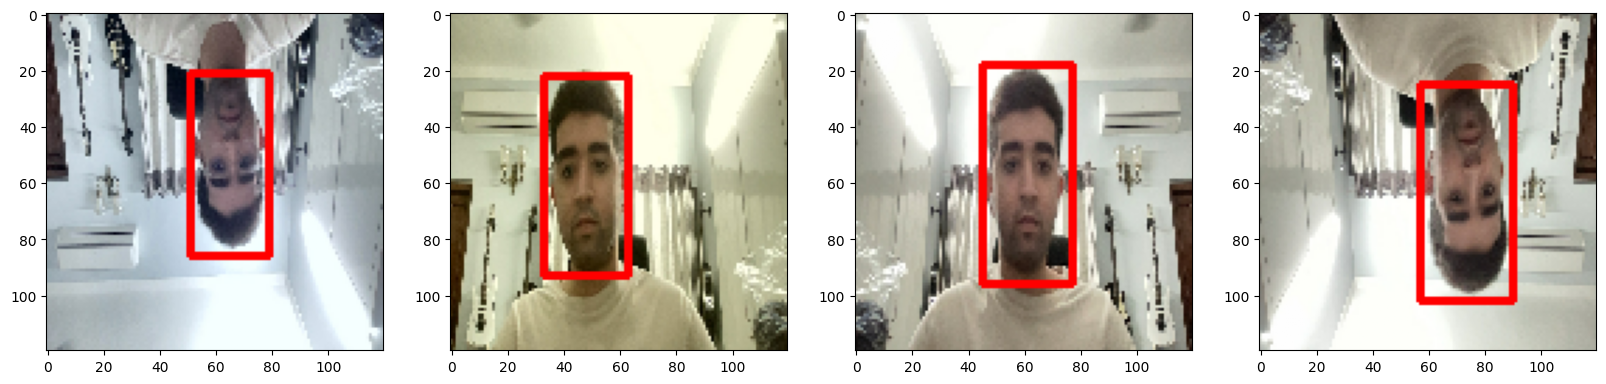

In [193]:
data_samples = train.as_numpy_iterator()
res = data_samples.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    # Create a writable copy of the image
    sample_image_copy = sample_image.copy()
    
    # Draw the rectangle on the writable copy
    cv2.rectangle(sample_image_copy, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                  (255, 0, 0), 2)
    
    ax[idx].imshow(sample_image_copy)


In [273]:
from tensorflow.keras import Model


In [275]:
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [276]:
print(tf.__version__) 

2.18.0


In [277]:
vgg = VGG16(include_top=False)

In [278]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [279]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [280]:
facetracker = build_model()

In [281]:
facetracker.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 3, 3, 512) │ 14,714,688 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │      2,049 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 4)         │      8,196 │ dense_10[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [282]:
X,y = train.as_numpy_iterator().next()

In [283]:
classes, coords = facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


In [284]:
classes, coords

(array([[0.45269206],
        [0.40305853],
        [0.5083483 ],
        [0.55097   ],
        [0.4984601 ],
        [0.49625096],
        [0.40418094],
        [0.50458324]], dtype=float32),
 array([[0.62066734, 0.39468363, 0.5397324 , 0.43923151],
        [0.70172554, 0.44364226, 0.49458113, 0.41158766],
        [0.5318586 , 0.36722088, 0.5186779 , 0.50029945],
        [0.5239576 , 0.37393436, 0.55337787, 0.44767904],
        [0.6234913 , 0.41962862, 0.49637163, 0.502419  ],
        [0.59610623, 0.3514057 , 0.59256494, 0.39543712],
        [0.51752204, 0.42077005, 0.5184481 , 0.414031  ],
        [0.54248   , 0.3917106 , 0.52555376, 0.4397895 ]], dtype=float32))

In [285]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [286]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,  # Starting learning rate
    decay_steps=batches_per_epoch,  # Decay happens after every epoch
    decay_rate=1 - lr_decay,        # Derived decay rate
    staircase=True                  # Discrete decay at each step
)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [287]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [288]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [289]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.190816402435303>

In [290]:
classloss(y[0], classes)


<tf.Tensor: shape=(), dtype=float32, numpy=0.7450875043869019>

In [291]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.190816402435303>

In [300]:
class FaceTracker(Model): 
    def __init__(self, eyetracker, **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        X, y = batch
        y[0].set_shape([None,1])  


        print(f"Shape of y[0]: {y[0].shape}")
        print(f"Shape of y[1]: {y[1].shape}")
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss + 0.5 * batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        self.opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        y[0].set_shape([None,1])  

        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss + 0.5 * batch_classloss
        
        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [301]:
model=FaceTracker(facetracker)

In [302]:
model.compile(opt, classloss, regressloss)

In [303]:
model.summary()

Model: "face_tracker_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_2 (Functional)       │ [(None, 1), (None, 4)] │    16,826,181 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [304]:
logdir='logs'

In [305]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [306]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 120, 120, None), dtype=tf.float32, name=None), (TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None), TensorSpec(shape=<unknown>, dtype=tf.float16, name=None)))>

In [307]:
hist = model.fit(train.take(100), epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
Shape of y[0]: (None, 1)
Shape of y[1]: <unknown>
Shape of y[0]: (None, 1)
Shape of y[1]: <unknown>


I0000 00:00:1732613657.465996  869985 service.cc:148] XLA service 0x600003a50000 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732613657.466676  869985 service.cc:156]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1732613657.530376  869985 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - class_loss: 0.0659 - regress_loss: 0.1678 - total_loss: 0.2008 - val_total_loss: 0.0540 - val_class_loss: 0.0020 - val_regress_loss: 0.0530
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - class_loss: 0.0303 - regress_loss: 0.0836 - total_loss: 0.0988 - val_total_loss: 0.5593 - val_class_loss: 0.3930 - val_regress_loss: 0.3628
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - class_loss: 0.0334 - regress_loss: 0.0753 - total_loss: 0.0920 - val_total_loss: 0.0950 - val_class_loss: 0.0176 - val_regress_loss: 0.0862
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - class_loss: 0.0364 - regress_loss: 0.0784 - total_loss: 0.0965 - val_total_loss: 0.0149 - val_class_loss: 0.0012 - val_regress_loss: 0.0143
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - class_loss: 0.0275 - regress_loss: 0.0667 - total_loss: 0.0804 - val_total_loss: 0.1459 - val_class_loss: 0.0699 - val_regress_loss: 0.1109
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━

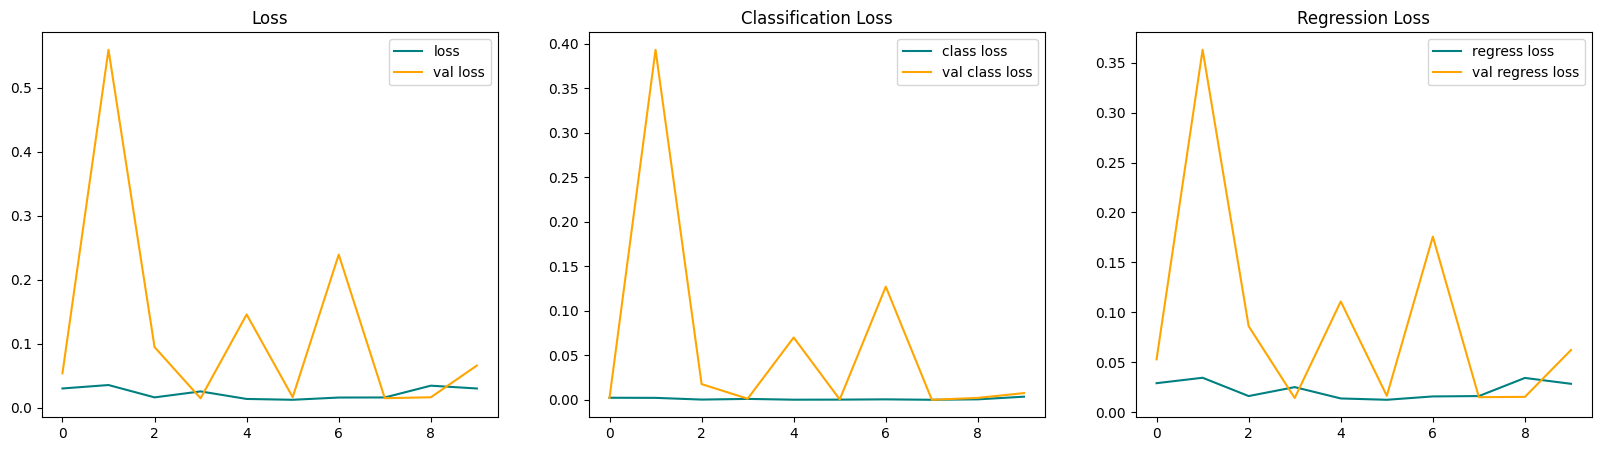

In [308]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [313]:
test_data = test.as_numpy_iterator()
test_sample = test_data.next()
yhat = facetracker.predict(test_sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


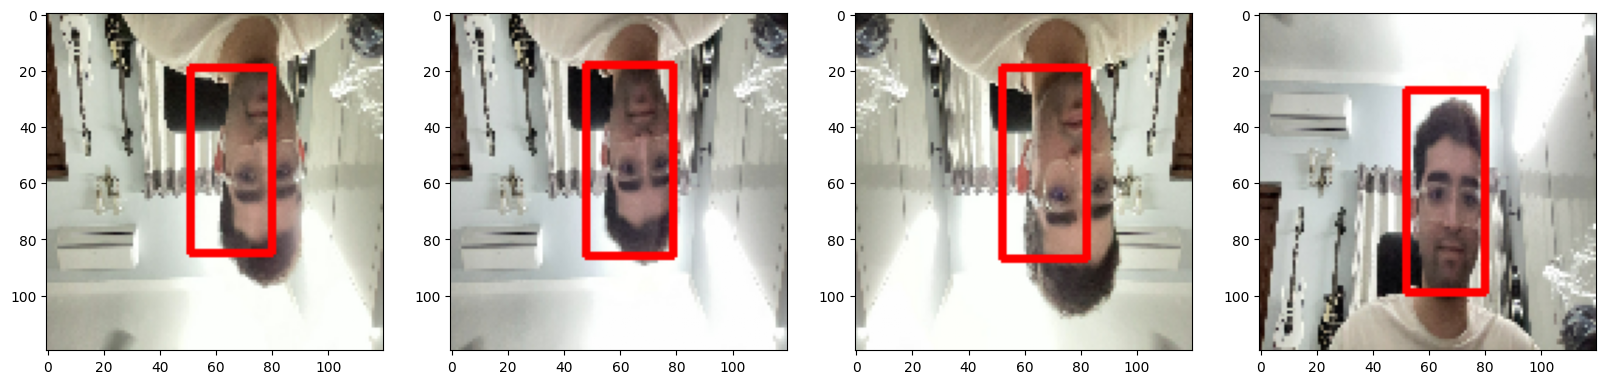

In [314]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    sample_image = np.copy(test_sample[0][idx])  # Make a writable copy
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)), 
                      (255, 0, 0), 2)
    
    ax[idx].imshow(sample_image)


In [2]:
from tensorflow.keras.models import load_model

In [3]:
facetracker.save('facetracker.keras')

NameError: name 'facetracker' is not defined

In [4]:
facetracker = load_model('facetracker.keras')

In [5]:
import cv2

In [16]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _, frame = cap.read()
    
    # Convert BGR to RGB
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120, 120))
    
    yhat = facetracker.predict(np.expand_dims(resized / 255, 0))
    sample_coords = yhat[1][0]
    
    height, width, _ = frame.shape
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [width, height]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [width, height]).astype(int)), 
                            (255, 0, 0), 2)
        
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [width, height]).astype(int), [0, -30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [width, height]).astype(int), [80, 0])), 
                            (255, 0, 0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [width, height]).astype(int), [0, -5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━